# **Data Cleaning**

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import kagglehub
import shutil
import os

path = kagglehub.dataset_download("aryashah2k/credit-card-customer-data")
print("Path to dataset files:", path)

src = path + "/Credit Card Customer Data.csv"
# sesuaikan dst path dengan lokasi yang diinginkan
dst = "/Users/HilalAbyan/Machine-Learning-Project/data/Credit Card Customer Data.csv"

if os.path.exists(src):
  shutil.move(src, dst)

Path to dataset files: /Users/HilalAbyan/.cache/kagglehub/datasets/aryashah2k/credit-card-customer-data/versions/2


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import joblib

In [4]:
path = dst
df_original = pd.read_csv(path)
df_original.head()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3


In [5]:
df_original.describe()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
count,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000
mean,330.500000,55141.443939,34574.242424,4.706061,2.403030,2.606061,3.583333
std,190.669872,25627.772200,37625.487804,2.167835,1.631813,2.935724,2.865317
min,1.000000,11265.000000,3000.000000,1.000000,0.000000,0.000000,0.000000
25%,165.750000,33825.250000,10000.000000,3.000000,1.000000,1.000000,1.000000
50%,330.500000,53874.500000,18000.000000,5.000000,2.000000,2.000000,3.000000
75%,495.250000,77202.500000,48000.000000,6.000000,4.000000,4.000000,5.000000
max,660.000000,99843.000000,200000.000000,10.000000,5.000000,15.000000,10.000000


In [6]:
df_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Sl_No                660 non-null    int64
 1   Customer Key         660 non-null    int64
 2   Avg_Credit_Limit     660 non-null    int64
 3   Total_Credit_Cards   660 non-null    int64
 4   Total_visits_bank    660 non-null    int64
 5   Total_visits_online  660 non-null    int64
 6   Total_calls_made     660 non-null    int64
dtypes: int64(7)
memory usage: 36.2 KB


In [7]:
df_original.isna().sum()

Sl_No                  0
Customer Key           0
Avg_Credit_Limit       0
Total_Credit_Cards     0
Total_visits_bank      0
Total_visits_online    0
Total_calls_made       0
dtype: int64

In [8]:
duplicate_customer_keys = df_original[df_original['Customer Key'].isin(df_original['Customer Key'][df_original['Customer Key'].duplicated()])].sort_values(by=['Customer Key'])
duplicate_customer_keys

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
48,49,37252,6000,4,0,2,8
432,433,37252,59000,6,2,1,2
4,5,47437,100000,6,0,12,3
332,333,47437,17000,7,3,1,0
411,412,50706,44000,4,5,0,2
541,542,50706,60000,7,5,2,2
391,392,96929,13000,4,5,0,0
398,399,96929,67000,6,2,2,2
104,105,97935,17000,2,1,2,10
632,633,97935,187000,7,1,7,0


# **EDA**

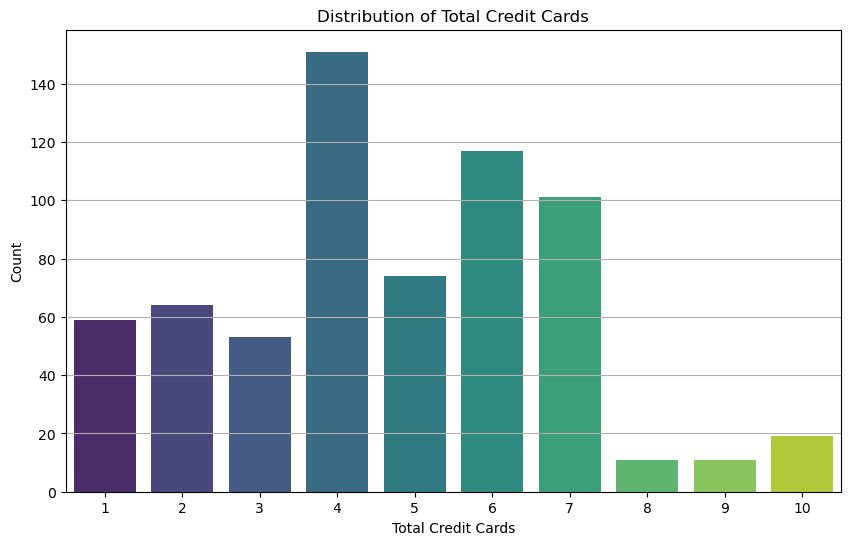

In [9]:
credit_card_counts = df_original['Total_Credit_Cards'].value_counts().reset_index()
credit_card_counts.columns = ['Total_Credit_Cards', 'Count']

plt.figure(figsize=(10, 6))
sns.barplot(x='Total_Credit_Cards', y='Count', data=credit_card_counts, palette='viridis')
plt.xlabel('Total Credit Cards')
plt.ylabel('Count')
plt.title('Distribution of Total Credit Cards')
plt.grid(axis='y')
plt.show()

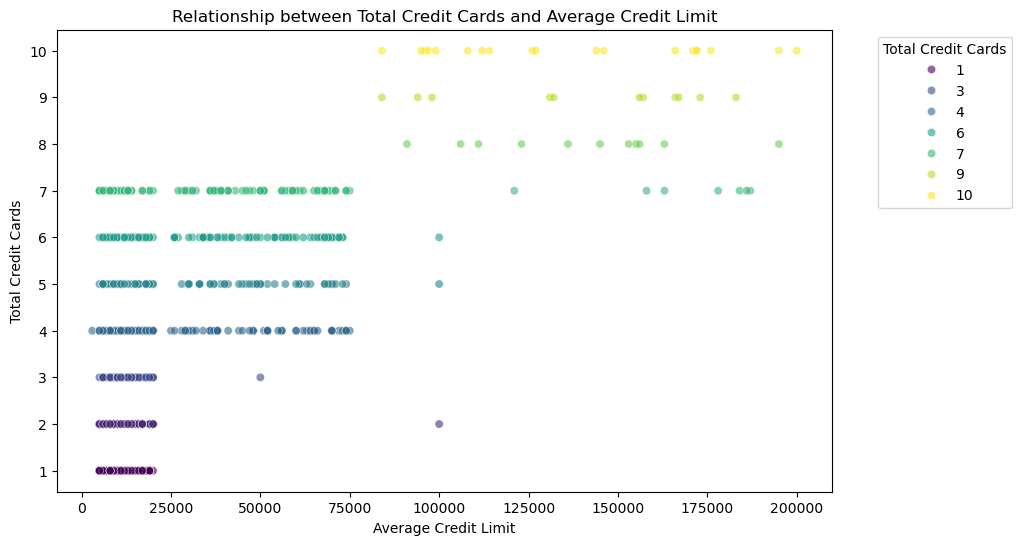

In [10]:
plt.figure(figsize=(10, 6))

sns.scatterplot(
    x='Avg_Credit_Limit',
    y='Total_Credit_Cards',
    data=df_original,
    hue='Total_Credit_Cards',
    palette='viridis',
    alpha=0.6
)

plt.xlabel('Average Credit Limit')
plt.ylabel('Total Credit Cards')
plt.yticks(range(1, 11))
plt.title('Relationship between Total Credit Cards and Average Credit Limit')

plt.legend(title='Total Credit Cards', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

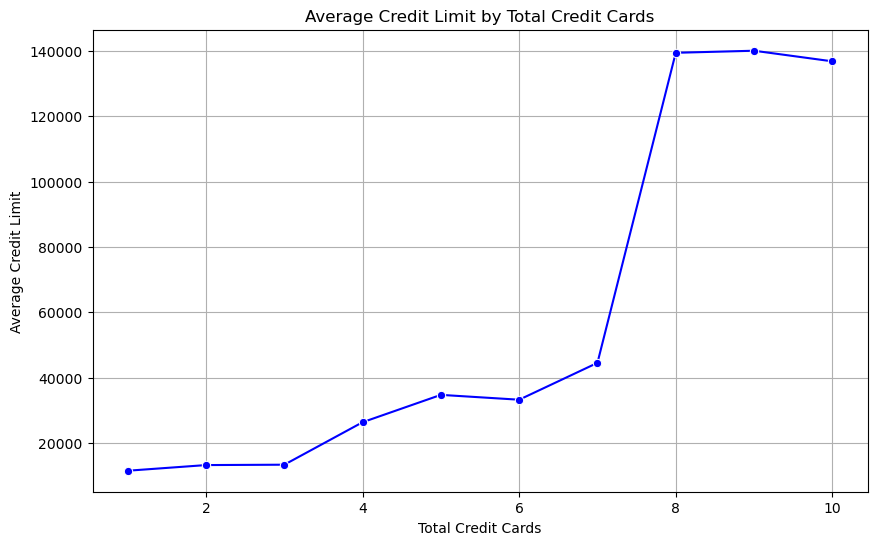

In [11]:
avg_limit_by_credit_cards = df_original.groupby('Total_Credit_Cards', as_index=False)['Avg_Credit_Limit'].mean()

plt.figure(figsize=(10, 6))
sns.lineplot(x='Total_Credit_Cards', y='Avg_Credit_Limit', data=avg_limit_by_credit_cards, marker='o', color='b')
plt.xlabel('Total Credit Cards')
plt.ylabel('Average Credit Limit')
plt.title('Average Credit Limit by Total Credit Cards')
plt.grid(True)
plt.show()


# **Preprocessing**

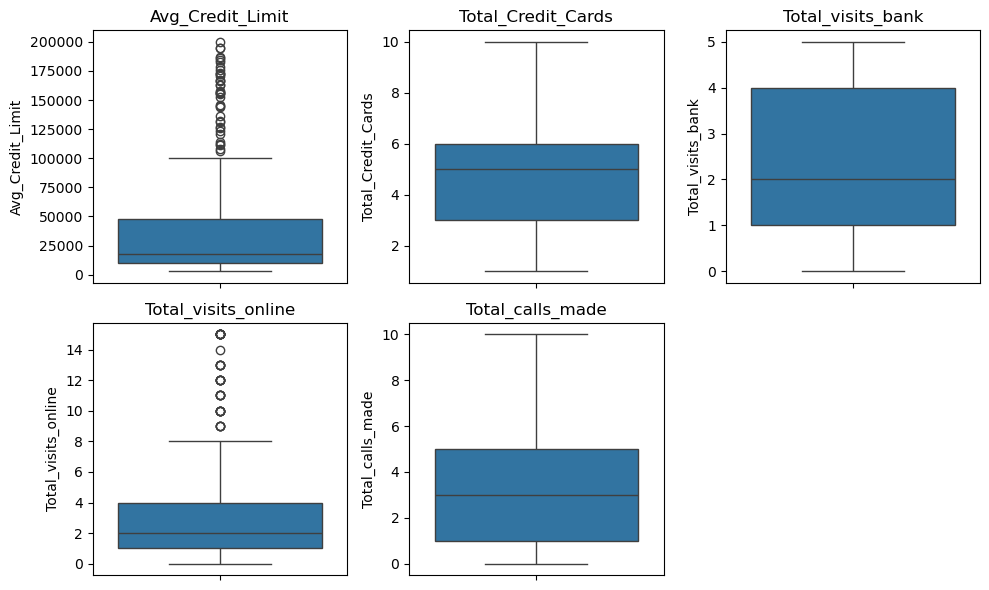

In [12]:
plt.figure(figsize=(10,6))

columns = ['Avg_Credit_Limit', 'Total_Credit_Cards', 'Total_visits_bank', 'Total_visits_online', 'Total_calls_made']

for i, col in enumerate(columns, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(df_original[col])
    plt.title(col)

plt.tight_layout()
plt.show()

In [13]:
df = df_original.copy()
scaler = MinMaxScaler()
df[columns] = scaler.fit_transform(df[columns])
joblib.dump(scaler, 'models/scaler.pkl')
print(df.head())

   Sl_No  Customer Key  Avg_Credit_Limit  Total_Credit_Cards  \
0      1         87073          0.492386            0.111111   
1      2         38414          0.238579            0.222222   
2      3         17341          0.238579            0.666667   
3      4         40496          0.137056            0.444444   
4      5         47437          0.492386            0.555556   

   Total_visits_bank  Total_visits_online  Total_calls_made  
0                0.2             0.066667               0.0  
1                0.0             0.666667               0.9  
2                0.2             0.200000               0.4  
3                0.2             0.066667               0.4  
4                0.0             0.800000               0.3  


<Figure size 1000x600 with 0 Axes>

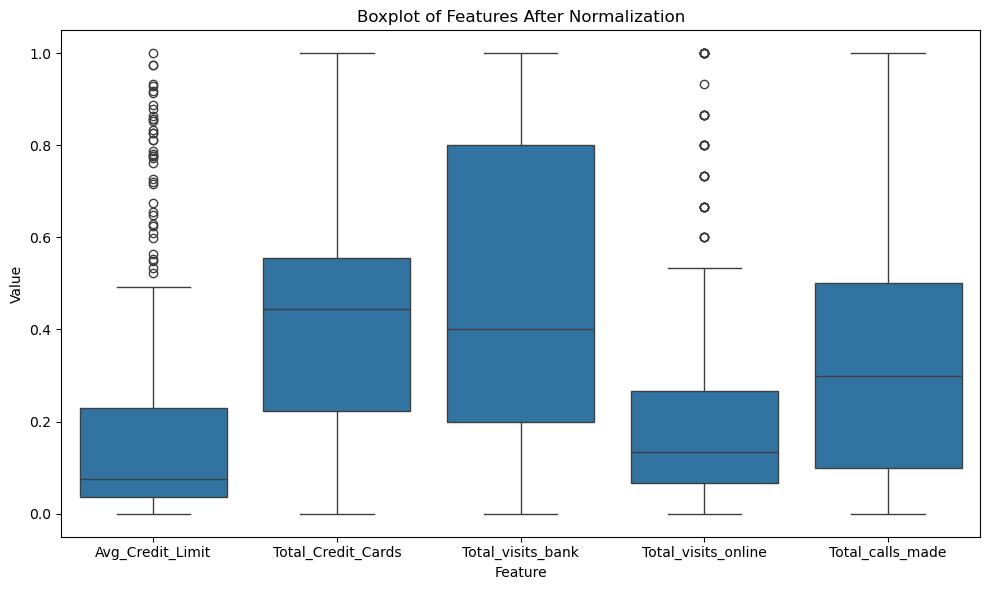

In [14]:
plt.figure(figsize=(10,6))

columns = ['Avg_Credit_Limit', 'Total_Credit_Cards', 'Total_visits_bank', 'Total_visits_online', 'Total_calls_made']
df_melted = df.melt(value_vars=columns, var_name="Feature", value_name="Value")

plt.figure(figsize=(10,6))
sns.boxplot(x="Feature", y="Value", data=df_melted)
plt.title("Boxplot of Features After Normalization")
plt.tight_layout()
plt.show()

# **Modelling**

In [15]:
X = df[['Avg_Credit_Limit', 'Total_Credit_Cards', 'Total_visits_bank', 'Total_visits_online', 'Total_calls_made']]
X

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,0.492386,0.111111,0.2,0.066667,0.0
1,0.238579,0.222222,0.0,0.666667,0.9
2,0.238579,0.666667,0.2,0.200000,0.4
3,0.137056,0.444444,0.2,0.066667,0.4
4,0.492386,0.555556,0.0,0.800000,0.3
...,...,...,...,...,...
655,0.487310,1.000000,0.2,0.666667,0.0
656,0.411168,1.000000,0.2,0.866667,0.2
657,0.720812,0.777778,0.2,0.600000,0.1
658,0.857868,1.000000,0.2,1.000000,0.0


In [22]:
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

models = {
    'KMeans': KMeans(n_clusters=3, random_state=42),
    'Hierarchical': AgglomerativeClustering(n_clusters=3),
    'DBSCAN': DBSCAN(eps=0.7, min_samples=5)
}

for name, model in models.items():
    try:
        labels = model.fit_predict(X_scaled)
        sil_score = silhouette_score(X_scaled, labels)
        db_score = davies_bouldin_score(X_scaled, labels)
        ch_score = calinski_harabasz_score(X_scaled, labels)

        print(f"{name}:\n  Silhouette Score: {sil_score:.3f} | DB Index: {db_score:.3f} | CH Index: {ch_score:.3f}\n")
    except Exception as e:
        print(f"{name} failed: {e}\n")

KMeans:
  Silhouette Score: 0.516 | DB Index: 0.680 | CH Index: 833.343

Hierarchical:
  Silhouette Score: 0.515 | DB Index: 0.681 | CH Index: 831.931

DBSCAN:
  Silhouette Score: 0.527 | DB Index: 0.837 | CH Index: 297.076



KMeans dipilih sebagai metode clustering karena memberikan hasil evaluasi yang paling seimbang dan konsisten. Dengan Silhouette Score sebesar 0.516 dan Calinski-Harabasz Index yang tinggi (833.343), KMeans menunjukkan pemisahan klaster yang baik dan terstruktur. Dibandingkan dengan Hierarchical yang kurang efisien untuk data besar, dan DBSCAN yang sensitif terhadap parameter serta menghasilkan pemisahan klaster yang kurang jelas, KMeans lebih stabil, cepat, dan cocok untuk data yang telah distandarisasi serta ketika jumlah klaster dapat ditentukan sejak awal.

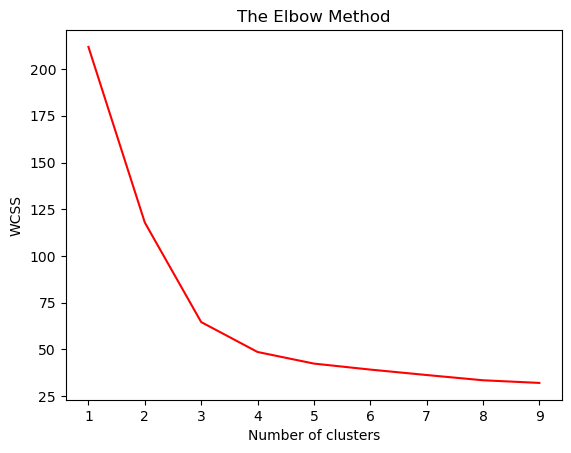

In [23]:
from sklearn.cluster import KMeans
wcss=[]

# asumsi jumlah K berada di antara 1 sampai 10
for i in range(1,10):
    kmeans = KMeans(n_clusters= i, init='k-means++', random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 10), wcss, color = 'red')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [24]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 0)
kmeans.fit(X)
joblib.dump(kmeans, 'models/kmeans_model.pkl')
y_kmeans = kmeans.predict(X)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

In [25]:
df['cluster'] = labels
df

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,cluster
0,1,87073,0.492386,0.111111,0.2,0.066667,0.0,0
1,2,38414,0.238579,0.222222,0.0,0.666667,0.9,1
2,3,17341,0.238579,0.666667,0.2,0.200000,0.4,0
3,4,40496,0.137056,0.444444,0.2,0.066667,0.4,1
4,5,47437,0.492386,0.555556,0.0,0.800000,0.3,2
...,...,...,...,...,...,...,...,...
655,656,51108,0.487310,1.000000,0.2,0.666667,0.0,2
656,657,60732,0.411168,1.000000,0.2,0.866667,0.2,2
657,658,53834,0.720812,0.777778,0.2,0.600000,0.1,2
658,659,80655,0.857868,1.000000,0.2,1.000000,0.0,2


In [26]:
from sklearn.metrics import silhouette_score

silhouette_avg = silhouette_score(X, labels)
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.5254186541442241


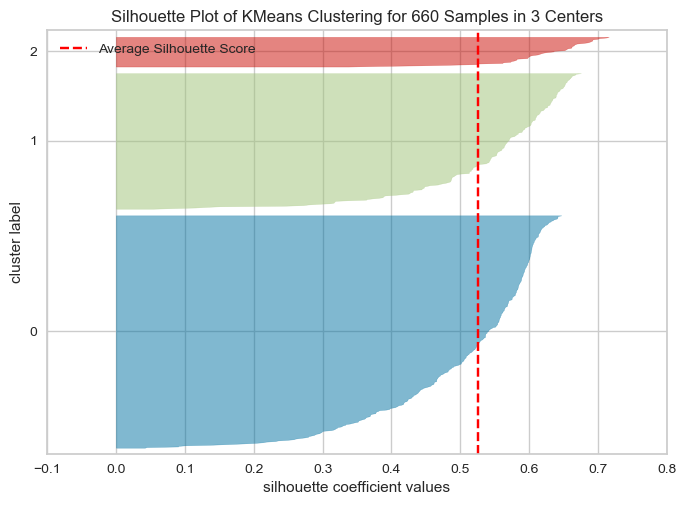

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 660 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [27]:
from yellowbrick.cluster import SilhouetteVisualizer
kmeans=KMeans(n_clusters = 3, init = 'k-means++', random_state = 0) #Initialising
visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick')
visualizer.fit(X)
visualizer.show()

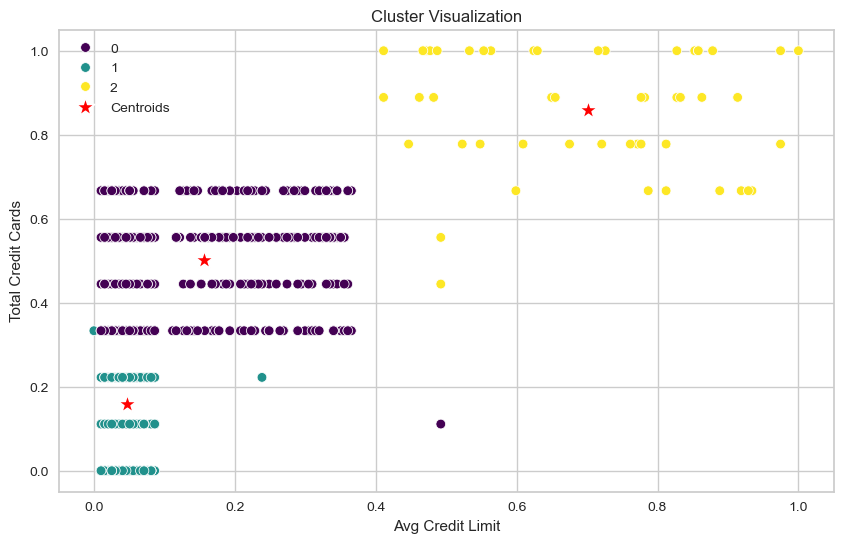

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['Avg_Credit_Limit'], y=df['Total_Credit_Cards'], hue=df['cluster'], palette='viridis')
sns.scatterplot(x=centroids[:, 0], y=centroids[:, 1], c='red', marker='*', s=200, label='Centroids')
plt.xlabel('Avg Credit Limit')
plt.ylabel('Total Credit Cards')
plt.title('Cluster Visualization')
plt.legend()
plt.show()


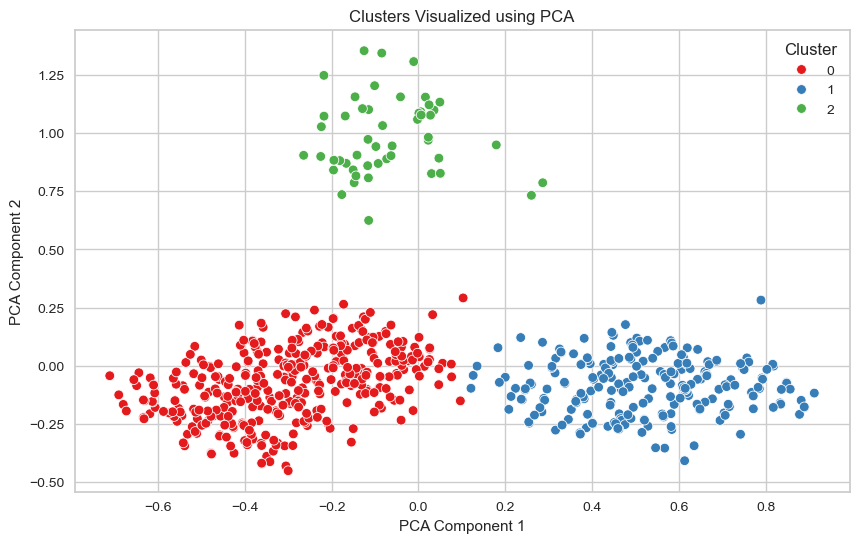

In [29]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
df_pca = pca.fit_transform(df[['Avg_Credit_Limit', 'Total_Credit_Cards', 'Total_visits_bank', 'Total_visits_online', 'Total_calls_made']])

plt.figure(figsize=(10,6))
sns.scatterplot(x=df_pca[:,0], y=df_pca[:,1], hue=df['cluster'], palette='Set1')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Clusters Visualized using PCA')
plt.legend(title='Cluster')
plt.show()

In [30]:
print(pd.DataFrame(pca.components_, columns=['Avg_Credit_Limit', 'Total_Credit_Cards',
                                             'Total_visits_bank', 'Total_visits_online', 'Total_calls_made'],
                   index=['PCA Component 1', 'PCA Component 2']))

                 Avg_Credit_Limit  Total_Credit_Cards  Total_visits_bank  \
PCA Component 1         -0.127648           -0.401099          -0.662984   
PCA Component 2          0.505653            0.441474          -0.491438   

                 Total_visits_online  Total_calls_made  
PCA Component 1             0.163709          0.597057  
PCA Component 2             0.482856         -0.273414  


# **Analisis**

In [31]:
df_original['cluster'] = df['cluster']
df_original

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,cluster
0,1,87073,100000,2,1,1,0,0
1,2,38414,50000,3,0,10,9,1
2,3,17341,50000,7,1,3,4,0
3,4,40496,30000,5,1,1,4,1
4,5,47437,100000,6,0,12,3,2
...,...,...,...,...,...,...,...,...
655,656,51108,99000,10,1,10,0,2
656,657,60732,84000,10,1,13,2,2
657,658,53834,145000,8,1,9,1,2
658,659,80655,172000,10,1,15,0,2


In [32]:
cluster_summary = df_original.groupby('cluster').mean(numeric_only=True)
cluster_summary

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
cluster,,,,,,,
0,418.602597,54918.693506,33792.207792,5.516883,3.496104,0.981818,1.994805
1,117.351111,55174.302222,12253.333333,2.422222,0.933333,3.542222,6.857778
2,611.280000,56708.760000,141040.000000,8.740000,0.600000,10.900000,1.080000


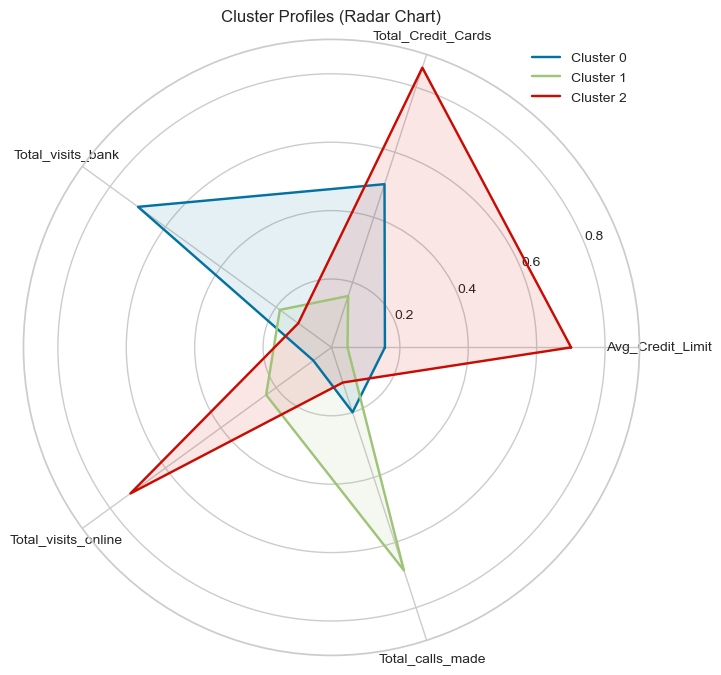

In [33]:
# Ambil ringkasan hanya dengan fitur yang relevan
features = ['Avg_Credit_Limit', 'Total_Credit_Cards', 'Total_visits_bank',
            'Total_visits_online', 'Total_calls_made']

cluster_summary = df.groupby('cluster')[features].mean()

# Radar Chart
import numpy as np
import matplotlib.pyplot as plt

angles = np.linspace(0, 2 * np.pi, len(features), endpoint=False).tolist()
angles += angles[:1]  # close loop

fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

for i in range(cluster_summary.shape[0]):
    values = cluster_summary.iloc[i].tolist()
    values += values[:1]
    ax.plot(angles, values, label=f'Cluster {i}')
    ax.fill(angles, values, alpha=0.1)

ax.set_thetagrids(np.degrees(angles[:-1]), features)
plt.title('Cluster Profiles (Radar Chart)')
plt.legend()
plt.show()


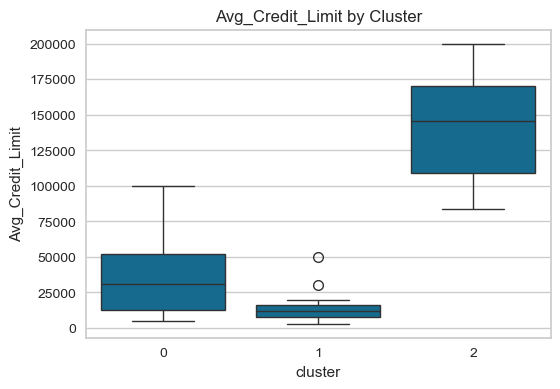

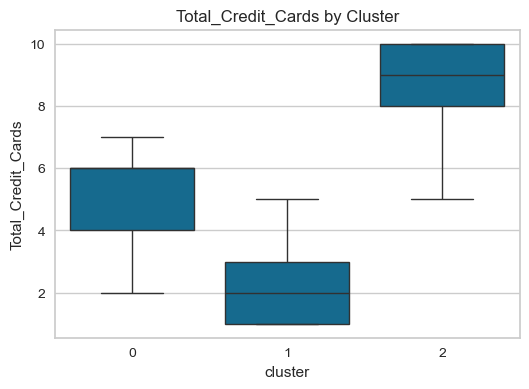

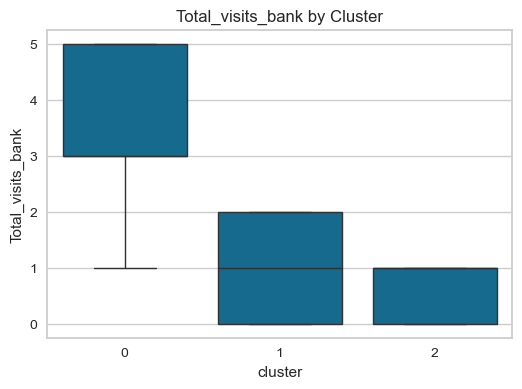

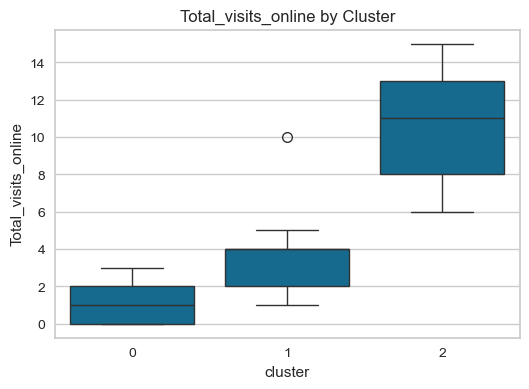

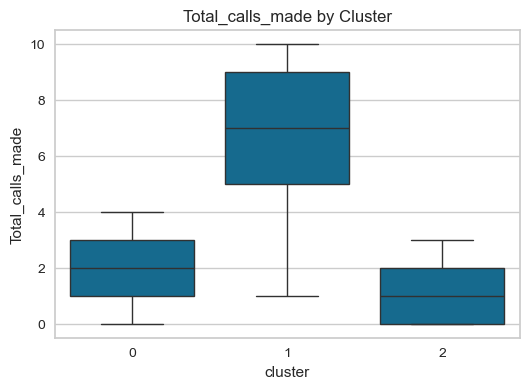

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

features = ['Avg_Credit_Limit', 'Total_Credit_Cards', 'Total_visits_bank',
            'Total_visits_online', 'Total_calls_made']

for feature in features:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x='cluster', y=feature, data=df_original)
    plt.title(f'{feature} by Cluster')
    plt.show()

# **Analisis**

**Analisis Segmentasi Pelanggan**

Berdasarkan analisis clustering dengan fokus pada `Avg_Credit_Limit` sebagai indikator utama nilai pelanggan, ditemukan tiga segmen pelanggan yang berbeda dengan karakteristik dan kebutuhan yang unik.

**Cluster 0 – High Credit Limit Group**

Karakteristik
- `Avg_Credit_Limit`: Paling tinggi
- `Total_Credit_Cards`: Tinggi
- `Total_visits_online`: Tinggi
- `Total_calls_made` dan `visits_bank`: Rendah

Profil Pelanggan

Segmen ini terdiri dari pelanggan bernilai tinggi yang merupakan digital-native users. Mereka memiliki kepercayaan tinggi dari bank (ditunjukkan dengan limit kredit besar) dan sudah terbiasa menggunakan layanan perbankan digital. Karakteristik mandiri dan tidak memerlukan banyak bantuan manual menunjukkan tingkat financial literacy yang baik.

**Cluster 2 – Medium Credit Limit Group**

Karakteristik
- `Avg_Credit_Limit`: Menengah
- `Total_visits_bank`: Sangat tinggi
- `Total_Credit_Cards`: Sedang
- Interaksi digital/call: Sangat rendah

Profil Pelanggan

Pelanggan dengan pendekatan tradisional yang masih mengandalkan layanan tatap muka di cabang bank. Meskipun memiliki nilai menengah, mereka menunjukkan loyalitas tinggi melalui kunjungan rutin ke bank. Segmen ini memiliki potensi besar untuk ditingkatkan nilainya melalui edukasi dan migrasi ke channel digital.

**Cluster 1 – Low Credit Limit Group**

Karakteristik
- `Avg_Credit_Limit`: Rendah
- `Total_calls_made`: Tinggi
- Interaksi lainnya: Rendah

Profil Pelanggan

Segmen dengan nilai transaksi rendah namun membutuhkan banyak dukungan customer service. Tingginya frekuensi panggilan dapat mengindikasikan kurangnya pemahaman terhadap produk/layanan atau ketidakpuasan. Dari perspektif cost-to-serve, segmen ini memerlukan pendekatan efisiensi operasional.